In [1]:
import pandas as pd 
from sklearn.decomposition import PCA
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
#import the new file
c_df = pd.read_csv('Churn_Clean.csv',dtype={'locationid':np.int64},index_col=0) 
c_df.head(10) 

,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,Population,...,MonthlyCharge,Bandwidth_GB_Year,Timely_Responses,Timely_Fixes,Timely_Replacements,Reliability,Options,Respectful_Response,Courteous_Exchange,Active_Listening
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,...,171.449762,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,...,242.948015,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,...,159.440398,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,...,120.249493,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,...,150.761216,271.493436,4,4,4,3,4,4,4,5
5,6,W303516,2b451d12-6c2b-4cea-a295-ba1d6bced078,Fort Valley,GA,Peach,31030,32.57032,-83.89040,17701,...,184.401558,1039.357983,3,3,3,2,4,3,3,3
6,7,U335188,6630d501-838c-4be4-a59c-6f58c814ed6a,Pioneer,TN,Scott,37847,36.43420,-84.27892,2535,...,200.064886,1907.242972,6,5,6,4,1,5,5,5
7,8,V538685,70ddaa89-b726-49dc-9022-2d655e4c7936,Oklahoma City,OK,Oklahoma,73109,35.43313,-97.52463,23144,...,114.754111,979.612708,2,2,2,5,2,3,4,5
8,9,M716771,05a49ee3-8fd5-453a-a5f3-82b6cd986856,Saint Cloud,FL,Osceola,34771,28.27646,-81.16273,17351,...,118.366844,1312.874964,5,4,4,3,4,3,4,4
9,10,I676080,86f17e4d-2c24-4b70-a6ec-dddf0609dbaa,Cincinnati,OH,Hamilton,45237,39.19296,-84.45230,20193,...,163.005280,508.763791,2,2,2,2,5,2,3,3


In [3]:
#define variables for PCA and store in new dataframe
Csliced = c_df[['Tenure','MonthlyCharge','Bandwidth_GB_Year','Timely_Responses','Timely_Fixes','Timely_Replacements','Reliability','Options','Respectful_Response','Courteous_Exchange','Active_Listening']]
Csliced.head()

,Tenure,MonthlyCharge,Bandwidth_GB_Year,Timely_Responses,Timely_Fixes,Timely_Replacements,Reliability,Options,Respectful_Response,Courteous_Exchange,Active_Listening
0,6.795513,171.449762,904.536110,5,5,5,3,4,4,3,4
1,1.156681,242.948015,800.982766,3,4,3,3,4,3,4,4
2,15.754144,159.440398,2054.706961,4,4,2,4,4,3,3,3
3,17.087227,120.249493,2164.579412,4,4,4,2,5,4,3,3
4,1.670972,150.761216,271.493436,4,4,4,3,4,4,4,5


In [4]:
#normalize the new dataframe 
Csliced_normalized = (Csliced-Csliced.mean())/Csliced.std()


In [5]:
#extract number of components from the analysis
pca = PCA(n_components=Csliced.shape[1])

#apply PCA to normalized dataset
pca.fit(Csliced_normalized)

#convert variables to principal components 
c_pca = pd.DataFrame(pca.transform(Csliced_normalized), columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9', 'PC10', 'PC11'])

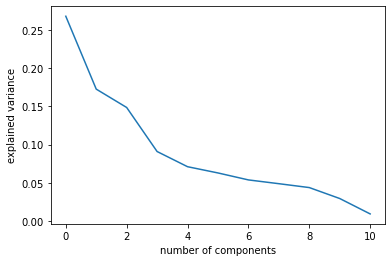

In [6]:
#create the scree plot
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('explained variance')
plt.show()

In [7]:
#calculate the covariance, vectors, define eigenvalues and scree plot
cov_matrix = np.dot(Csliced_normalized.T, Csliced_normalized) / Csliced.shape[0]
eigenvalues = [np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)) for
eigenvector in pca.components_]

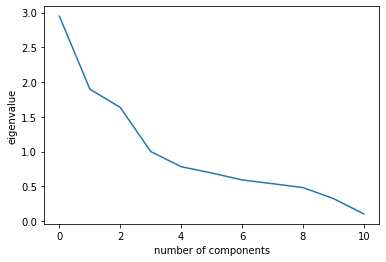

In [8]:
#scree plot shows there is no benefit in using more than 3 components
plt.plot(eigenvalues)
plt.xlabel('number of components')
plt.ylabel('eigenvalue')
plt.show()

In [9]:
#load the outputs of the components
loadings = pd.DataFrame(pca.components_.T,
     columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10', 'PC11'],
     index=Csliced_normalized.columns)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
Tenure,-0.010567,0.701822,-0.072273,-0.063592,0.005604,-0.011232,0.007525,-0.011491,0.007226,0.002961,-0.705450
MonthlyCharge,0.000314,0.041361,-0.014192,0.996993,-0.022253,0.015199,-0.018011,-0.004297,0.023748,-0.013824,-0.047630
Bandwidth_GB_Year,-0.012255,0.703058,-0.074321,0.004100,0.010008,0.003689,0.003488,-0.002471,-0.008603,0.008956,0.706918
Timely_Responses,0.458931,0.031374,0.281152,0.018581,-0.070245,-0.119139,-0.045976,0.025456,-0.240570,0.793233,-0.004841
Timely_Fixes,0.434131,0.042653,0.282394,0.007502,-0.106634,-0.169735,-0.065438,0.074432,-0.592127,-0.573834,-0.002206
Timely_Replacements,0.400635,0.034928,0.281088,-0.019678,-0.173751,-0.255342,-0.146870,-0.396375,0.673054,-0.177653,0.015448
Reliability,0.145800,-0.050319,-0.567823,-0.010356,-0.171329,-0.483305,-0.443377,0.431520,0.087231,0.018299,0.002408
Options,-0.175636,0.066402,0.587326,-0.000040,0.135963,0.060124,-0.209767,0.693838,0.265527,-0.042021,-0.002350
Respectful_Response,0.405206,-0.012501,-0.183468,0.004554,-0.062337,0.064586,0.757955,0.402834,0.230318,-0.063973,0.001970
Courteous_Exchange,0.358341,-0.003900,-0.181695,-0.027962,-0.182369,0.806183,-0.379112,0.067873,0.067329,-0.040953,-0.007028


In [10]:
# Extract and print the 3 components from the PCA
C_reduced = c_pca.iloc[ : , 0:3]
print(C_reduced)

           PC1       PC2       PC3
0     1.924097 -1.417626  1.902881
1    -0.199527 -1.703028  0.538571
2    -0.667793 -0.982504  0.227158
3     0.046572 -0.726722  2.281765
4     1.327036 -1.921248  0.825619
...        ...       ...       ...
9995 -2.098369  1.965473  0.103535
9996  1.917143  1.650686  0.610328
9997  1.432528  0.280156  0.032732
9998  2.011016  2.192636 -0.080644
9999 -2.266716  1.596094 -0.820630

[10000 rows x 3 columns]
